<a href="https://colab.research.google.com/github/lilamil/amil1/blob/main/rungeKUTTA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

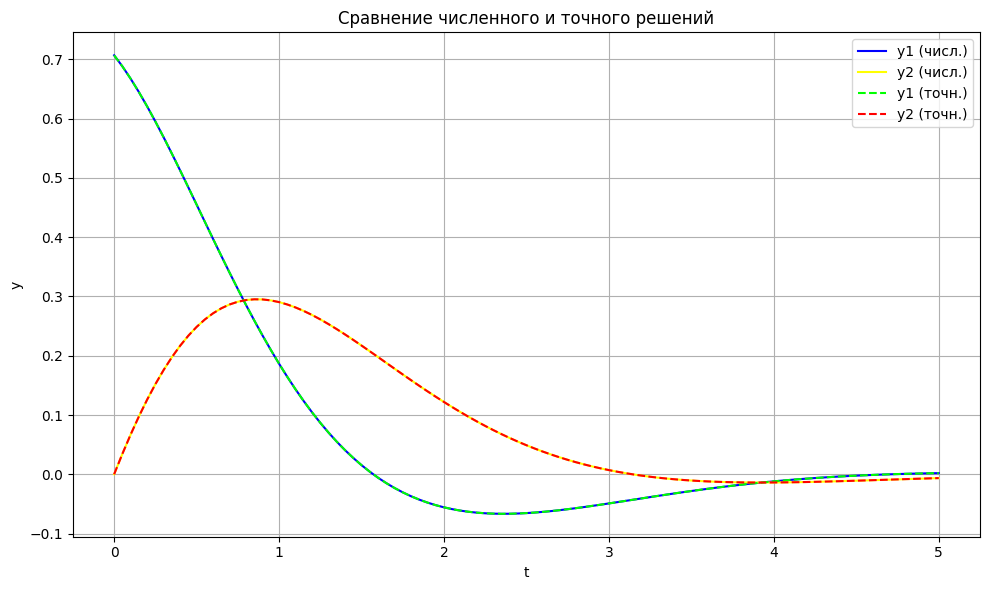

In [2]:
import numpy as np
import matplotlib.pyplot as plt

def f(t, y):
    y1, y2 = y
    dy1 = -np.sin(t) / np.sqrt(1 + np.exp(2 * t)) + y1 * (y1**2 + y2**2 - 1)
    dy2 =  np.cos(t) / np.sqrt(1 + np.exp(2 * t)) + y2 * (y1**2 + y2**2 - 1)
    return np.array([dy1, dy2])

def exact_solution(t):
    y1 = np.cos(t) / np.sqrt(1 + np.exp(2 * t))
    y2 = np.sin(t) / np.sqrt(1 + np.exp(2 * t))
    return np.array([y1, y2])

t_start = 0
t_end = 5
h = 0.05
num_steps = int((t_end - t_start) / h)

t = np.arange(t_start, t_end + h, h)
y = np.zeros((num_steps + 1, 2))

y[0, 0] = exact_solution(0)[0]
y[0, 1] = exact_solution(0)[1]

for i in range(num_steps):
    k1 = f(t[i], y[i])
    k2 = f(t[i] + h/2, y[i] + h/2 * k1)
    k3 = f(t[i] + 3*h/4, y[i] + 3*h/4 * k2)
    y[i + 1] = y[i] + h * (2*k1 + 3*k2 + 4*k3) / 9

y_exact_all = np.array([exact_solution(ti) for ti in t])

plt.figure(figsize=(10, 6))
plt.plot(t, y[:, 0], label='y1 (числ.)', color='blue')
plt.plot(t, y[:, 1], label='y2 (числ.)', color='yellow')
plt.plot(t, y_exact_all[:, 0], '--', label='y1 (точн.)', color='lime')
plt.plot(t, y_exact_all[:, 1], '--', label='y2 (точн.)', color='red')

plt.xlabel('t')
plt.ylabel('y')
plt.title('Сравнение численного и точного решений')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

       h           alpha            C(h)
  0.0100      3.00769421      0.00836377
  0.0200      3.01333660      0.00855044
  0.0300      3.01795622      0.00869007
  0.0400      3.02497515      0.00888864
  0.0500      3.02897250      0.00899573
  0.0600      3.03389231      0.00912111
  0.0700      3.04238246      0.00932938
  0.0800      3.04603613      0.00941587
  0.0900      3.04030747      0.00928688
       h             err   log(h)        log(err)
  0.0100 0.000000008072605 -2.00000000 -8.092986307070868
  0.0200 0.000000064926182 -1.69897000 -7.187580132754897
  0.0300 0.000000220314004 -1.52287875 -6.656957897241681
  0.0400 0.000000524930418 -1.39794001 -6.279898260218787
  0.0500 0.000001030984463 -1.30103000 -5.986747879314819
  0.0600 0.000001790976706 -1.22184875 -5.746910062664256
  0.0700 0.000002858902125 -1.15490196 -5.543800712575936
  0.0800 0.000004291735711 -1.09691001 -5.367367030122220
  0.0900 0.000006143917871 -1.04575749 -5.211554598355206
  0.1000 0.0000084

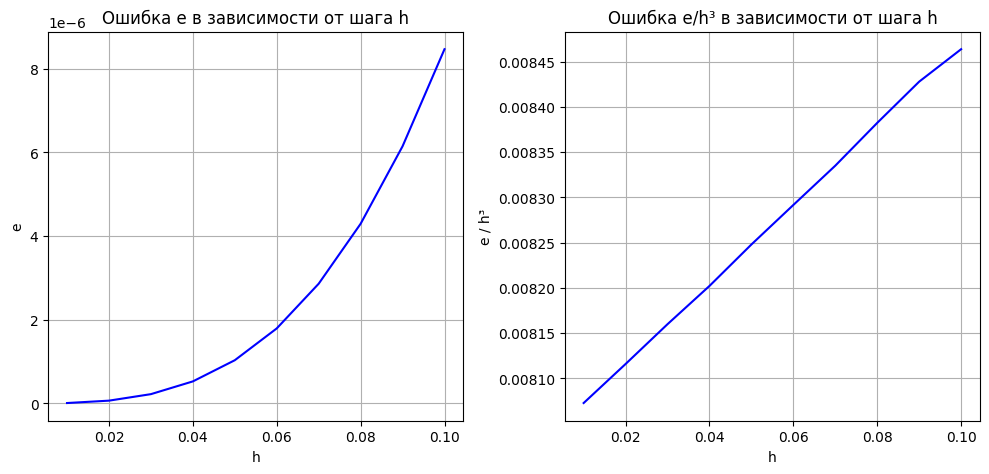

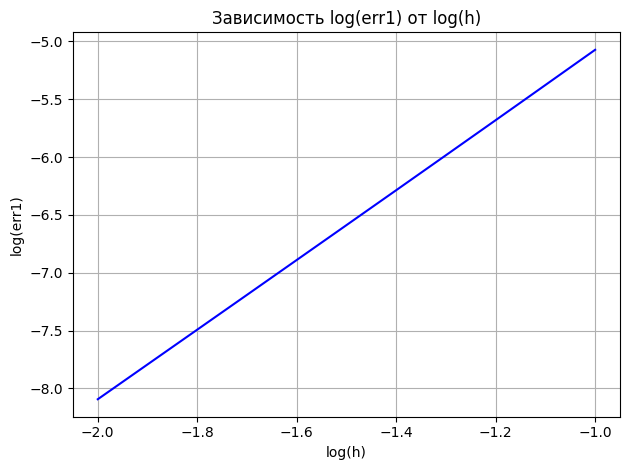

In [3]:
hs = np.linspace(0.01, 0.1, 10)[::-1]
hs = sorted(hs)
errors = []

for h in hs:
    t = np.arange(t_start, t_end + h, h)
    num_steps = len(t) - 1
    y = np.zeros((num_steps + 1, 2))
    y[0, 0] = exact_solution(0)[0]
    y[0, 1] = exact_solution(0)[1]

    for i in range(num_steps):
        k1 = f(t[i], y[i])
        k2 = f(t[i] + h/2, y[i] + h/2 * k1)
        k3 = f(t[i] + 3*h/4, y[i] + 3*h/4 * k2)
        y[i + 1] = y[i] + h * (2*k1 + 3*k2 + 4*k3) / 9

    max_error = 0
    for i in range(num_steps + 1):
        exact = exact_solution(t[i])
        err = np.max(np.abs(y[i] - exact))
        max_error = max(max_error, err)
    errors.append(max_error)

errors = np.array(errors)
ratios = errors / (np.array(hs) ** 3)
err_logged = np.log10(errors)
h_logged = np.log10(hs)

alpha = []
for i in range(0, len(hs)-1):
    alpha.append(np.log10(errors[i+1]/errors[i])/np.log10(hs[i+1]/hs[i]))
print(f"{'h':>8} {'alpha':>15} {'C(h)':>15}")
for i in range(len(alpha)):
    print(f"{hs[i]:8.4f} {alpha[i]:15.8f} {errors[i]/(hs[i]**alpha[i]):15.8f}")

print(f"{'h':>8} {'err':>15} {'log(h)':>8} {'log(err)':>15}")
for i in range(len(errors)):
    print(f"{hs[i]:8.4f} {errors[i]:15.15f} {h_logged[i]:8.8f} {err_logged[i]:15.15f}")

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.plot(hs, errors, 'b')
plt.title("Ошибка e в зависимости от шага h")
plt.xlabel("h")
plt.ylabel("e")
plt.grid(True)


plt.subplot(1, 2, 2)
plt.plot(hs, ratios, 'b')
plt.title("Ошибка e/h³ в зависимости от шага h")
plt.xlabel("h")
plt.ylabel("e / h³")
plt.grid(True)
plt.tight_layout()
plt.show()

plt.figure()
plt.plot(h_logged, err_logged, 'b')
plt.title('Зависимость log(err1) от log(h)')
plt.xlabel('log(h)')
plt.ylabel('log(err1)')
plt.grid(True)
plt.tight_layout()
plt.show()

In [4]:
alpha = []
for i in range(0, len(hs)-1):
    alpha.append(np.log10(errors[i+1]/errors[i])/np.log10(hs[i+1]/hs[i]))

print(f"{'h':>8} {'alpha':>15} {'C(h)':>15}")
for i in range(len(alpha)):
    print(f"{hs[i+1]:8.4f} {alpha[i]:15.8f} {errors[i+1]/(hs[i+1]**alpha[i]):15.8f}")

       h           alpha            C(h)
  0.0200      3.00769421      0.00836377
  0.0300      3.01333660      0.00855044
  0.0400      3.01795622      0.00869007
  0.0500      3.02497515      0.00888864
  0.0600      3.02897250      0.00899573
  0.0700      3.03389231      0.00912111
  0.0800      3.04238246      0.00932938
  0.0900      3.04603613      0.00941587
  0.1000      3.04030747      0.00928688


In [5]:
import numpy as np
import plotly.graph_objects as go

def f_task(t, vars, beta2, lambd1=1, lambd2=1, beta1=1, c=3):
    x, y = vars
    if y < 0: y = 0
    if x < 0: x = 0
    if x > c: x = c
    dx = (-lambd1 + beta1 * y**(2/3) * (1 - x/c) / (1 + x)) * x
    dy = lambd2 * y - beta2 * x * y**(2/3) / (1 + x)
    return np.array([dx, dy])

def rk3(f, t0, t1, h, y0, **kwargs):
    t_vals = np.arange(t0, t1 + h, h)
    y_vals = np.zeros((len(t_vals), len(y0)))
    y_vals[0] = y0

    for i in range(len(t_vals) - 1):
        t = t_vals[i]
        y = y_vals[i]
        k1 = f(t, y, **kwargs)
        k2 = f(t + h/2, y + h/2 * k1, **kwargs)
        k3 = f(t + 3*h/4, y + 3*h/4 * k2, **kwargs)
        y_vals[i + 1] = y + h * (2*k1 + 3*k2 + 4*k3) / 9

    return t_vals, y_vals

beta2_values = [3, 3.48, 5]
y0_values = [0.5, 1, 2, 3, 5, 7, 9]
h = 0.01
t0 = 0
t1 = 20
x0 = 1

for beta2 in beta2_values:
    fig = go.Figure()
    print(f"\nСтационарные значения для β2 = {beta2}:")
    print(f"{'y0':>8} {'x (t=20)':>10} {'y (t=20)':>10} {'dx/dt':>12} {'dy/dt':>12}")

    for y0 in y0_values:
        t_vals, sol = rk3(f_task, t0, t1, h, y0=[x0, y0], beta2=beta2)
        x_vals, y_vals = sol[:, 0], sol[:, 1]

        fig.add_trace(go.Scatter(
            x=x_vals,
            y=y_vals,
            mode='lines',
            name=f"y₀ = {y0}",
            line=dict(width=2),
            opacity=0.8
        ))

        x_last, y_last = sol[-1, 0], sol[-1, 1]
        derivs = f_task(t_vals[-1], sol[-1], beta2=beta2)
        print(f"{y0:8.2f} {x_last:10.4f} {y_last:10.4f} {derivs[0]:12.6f} {derivs[1]:12.6f}")

    fig.update_layout(
        title=f"Фазовая траектория (x, y) при β₂ = {beta2}",
        xaxis_title="x (лимфоциты)",
        yaxis_title="y (опухоль)",
        width=900,
        height=700,
        legend=dict(x=1.05, y=1),
        showlegend=True,
        template="plotly_white"
    )
    fig.show()


Стационарные значения для β2 = 3:
      y0   x (t=20)   y (t=20)        dx/dt        dy/dt
    0.50     2.9658  6565.4619     0.019986  5778.819645
    1.00     2.9379  2669.6650     0.034544  2238.942305
    2.00     2.9192  1794.7639     0.043642  1464.754889
    3.00     2.9613  5435.5551     0.022456  4742.245330
    5.00     3.0005 150965.4067    -3.000000 144586.188188
    7.00     3.2450 1486323.5104    -3.000000 1457019.655885
    9.00     3.1210 6260111.3824    -3.000000 6183686.069566



Стационарные значения для β2 = 3.48:
      y0   x (t=20)   y (t=20)        dx/dt        dy/dt
    0.50     2.8275   565.3604     0.077431   389.588751
    1.00     1.9041    24.3737     0.109471     5.192828
    2.00     0.9858     5.0522    -0.004493    -0.034407
    3.00     0.9001     4.4696    -0.000406    -0.003529
    5.00     0.9074     4.5110    -0.001419    -0.008701
    7.00     2.3302    63.1011     0.146066    24.506664
    9.00     2.9841 20803.4268     0.009525 18831.818137



Стационарные значения для β2 = 5:
      y0   x (t=20)   y (t=20)        dx/dt        dy/dt
    0.50     0.0000    -0.0000    -0.000000     0.000000
    1.00     0.6504     1.2003    -0.301763    -1.025102
    2.00     0.1733     3.8993     0.171479     2.069755
    3.00     0.3927     4.5452     0.279722     0.677054
    5.00     0.2852     3.7057     0.195690     1.048538
    7.00     0.1583     2.6475     0.089450     1.339627
    9.00     0.1087     1.7417     0.028088     1.031918


In [6]:
for beta2 in beta2_values:
    fig_x = go.Figure()
    for y0 in y0_values:
        t_vals, sol = rk3(f_task, t0, t1, h, y0=[x0, y0], beta2=beta2)
        x_vals = sol[:, 0]

        fig_x.add_trace(go.Scatter(
            x=t_vals, y=x_vals,
            mode='lines',
            name=f"y₀={y0}",
            line=dict(width=2)
        ))

    fig_x.update_layout(
        title=f"Динамика лимфоцитов x(t), β₂={beta2}",
        xaxis_title="Время t",
        yaxis_title="x (лимфоциты)",
        width=900,
        height=500,
        template="plotly_white"
    )
    fig_x.show()

for beta2 in beta2_values:
    fig_y = go.Figure()
    for y0 in y0_values:
        t_vals, sol = rk3(f_task, t0, t1, h, y0=[x0, y0], beta2=beta2)
        y_vals = sol[:, 1]

        fig_y.add_trace(go.Scatter(
            x=t_vals, y=y_vals,
            mode='lines',
            name=f"y₀={y0}",
            line=dict(width=2)
        ))

    fig_y.update_layout(
        title=f"Динамика опухоли y(t), β₂={beta2}",
        xaxis_title="Время t",
        yaxis_title="y (опухоль)",
        width=900,
        height=500,
        template="plotly_white"
    )
    fig_y.show()